<center><h5>OPEN DATA PROJECT</h5></center>


<center><h1>THEFT IN RESIDENTIAL DEVELOPMENTS</h1></center>

<center><h1>-</h1></center>

<center><small>ELIJAH ESMERO</small></center>

<center><img src="images/crime_data_webpage.png"></center>

<center><img src="images/land_value_data_webpage.png"></center>

<center><img src="images/raw_sydney_map.png"></center>

<center><img src="images/edited_sydney_map.png"></center>

<center><img src="images/marsdenpark_annual_progression/map_20130816.png"></center>

<center><img src="images/marsdenpark_annual_progression/map_20190719.png"></center>

<center><img src="images/marsdenpark_theft_facebookposts/theft collage.png"></center>

<center><h1>DO RESIDENTIAL DEVELOPMENTS EXPERIENCE MORE THEFT?</h1></center>

<center><h3>OR RATHER...</h3></center>

<center><h1>DOES THE "THEFT PER HOUSE" IN A SUBURB INCREASE AS THE NUMBER OF HOUSES INCREASES?</h1></center>

<center><img src="images/land_value_data_webpage.png"></center>

In [1]:
# ==============================
# DOWNLOADING LAND VALUE DATASET
# ==============================

required_zipfiles_list = [
 'LV_20170701.zip',
 'LV_20170801.zip',
 'LV_20170901.zip',
 'LV_20171001.zip',
 'LV_20171101.zip',
 'LV_20171201.zip',
 'LV_20180101.zip',
 'LV_20180201.zip',
 'LV_20180301.zip',
 'LV_20180401.zip',
 'LV_20180501.zip',
 'LV_20180601.zip',
 'LV_20180701.zip',
 'LV_20180801.zip',
 'LV_20180901.zip',
 'LV_20181001.zip',
 'LV_20181101.zip',
 'LV_20181201.zip',
 'LV_20190101.zip',
 'LV_20190201.zip',
 'LV_20190301.zip',
 'LV_20190401.zip',
 'LV_20190501.zip',
 'LV_20190601.zip',
 'LV_20190701.zip']

In [72]:
# ==============================
# DOWNLOADING LAND VALUE DATASET
# ==============================

import requests
from pathlib import Path

# make list of local zip file paths
local_zipfile_path_list = sorted(Path("data/land_value_data").glob("**/*.zip"))

# make a list of strings from the local zip file paths
local_zipfile_list = [path.name for path in local_zipfile_path_list]

# check if required zipfiles are already downloaded, if not then download them
while(required_zipfiles_list != local_zipfile_list): # to repeat loop as case r.status_code may not be 200
    for zipfile in required_zipfiles_list:
        if zipfile in local_zipfile_list:
            print(zipfile + " is already downloaded")
        else: 
            url = "https://www.valuergeneral.nsw.gov.au/land_value_summaries/lvfiles/{}".format(zipfile)

            # get filename from url
            filename = url.split("/")[-1]

            # download file from url
            r = requests.get(url, stream = True)
            if r.status_code is 200:
                print("downloading " + zipfile)
                with open(filename,"wb") as f:
                    f.write(r.content)
            
# revise paths of local zip files
local_zipfile_path_list = sorted(Path("data/land_value_data").glob("**/*.zip"))

<center><img src="images/zipfile_extraction_size_difference.png"></center>

<center><img src="images/zipfile_contents.png"></center>

In [43]:
# ============================
# ACCESSING LAND VALUE DATASET
# ============================

dtype_dict={"DISTRICT CODE": int, 
            "DISTRICT NAME": str,
            "PROPERTY ID": int,
            "PROPERTY TYPE": str,
            "PROPERTY NAME": str,
            "UNIT NUMBER": str,
            "HOUSE NUMBER": str,
            "STREET NAME": str,
            "SUBURB NAME": str,
            "POSTCODE": float,
            "PROPERTY DESCRIPTION": str,
            "ZONE CODE": str,
            "AREA": float,
            "AREA TYPE": str,
            "BASE DATE 1": str,
            "LAND VALUE 1": float,
            "AUTHORITY 1": str,
            "BASIS 1": str,
            "BASE DATE 2": str,
            "LAND VALUE 2": float,
            "AUTHORITY 2": str,
            "BASIS 2": str,
            "BASE DATE 3": str,
            "LAND VALUE 3": float,
            "AUTHORITY 3": str,
            "BASIS 3": str,
            "BASE DATE 4": str,
            "LAND VALUE 4": float,
            "AUTHORITY 4": str,
            "BASIS 4": str,
            "BASE DATE 5": str,
            "LAND VALUE 5": float,
            "AUTHORITY 5": str,
            "BASIS 5": str,
            "Unnamed: 34": str}

In [120]:
# ============================
# ACCESSING LAND VALUE DATASET
# ============================

def concat_all_csv_in_zipfile_into_one_df(zipfile_path):
    with zipfile.ZipFile(zipfile_path) as zip:
        csv_in_zipfile_list = sorted(zip.namelist())[:-1]  # to exclude the commons.txt file
        df = pd.concat([pd.read_csv(zip.open(csv),
                                    encoding="ISO-8859-1",
                                    error_bad_lines=False,
                                    dtype=dtype_dict) for csv in csv_in_zipfile_list], sort=False)
    return df

lv_data_201907 = concat_all_csv_in_zipfile_into_one_df(local_zipfile_path_list[-1])
lv_data_201907

,DISTRICT CODE,DISTRICT NAME,PROPERTY ID,PROPERTY TYPE,PROPERTY NAME,UNIT NUMBER,HOUSE NUMBER,STREET NAME,SUBURB NAME,POSTCODE,...,BASIS 3,BASE DATE 4,LAND VALUE 4,AUTHORITY 4,BASIS 4,BASE DATE 5,LAND VALUE 5,AUTHORITY 5,BASIS 5,Unnamed: 34
0,1,CESSNOCK,3017030,NORMAL,NaN,NaN,25,ECHIDNA CL,BELLBIRD,2325.0,...,6A(1),01/07/2015,262000.0,14A(1),6A(1),01/07/2014,256000.0,14A(1),6A(1),NaN
1,1,CESSNOCK,3017031,NORMAL,NaN,NaN,27,ECHIDNA CL,BELLBIRD,2325.0,...,6A(1),01/07/2015,262000.0,14A(1),6A(1),01/07/2014,256000.0,14A(1),6A(1),NaN
2,1,CESSNOCK,3017032,NORMAL,NaN,NaN,41,ECHIDNA CL,BELLBIRD,2325.0,...,6A(1),01/07/2015,262000.0,14A(1),6A(1),01/07/2014,256000.0,14A(1),6A(1),NaN
3,1,CESSNOCK,3017033,NORMAL,NaN,NaN,43,ECHIDNA CL,BELLBIRD,2325.0,...,6A(1),01/07/2015,262000.0,14A(1),6A(1),01/07/2014,256000.0,14A(1),6A(1),NaN
4,1,CESSNOCK,3017034,NORMAL,NaN,NaN,45,ECHIDNA CL,BELLBIRD,2325.0,...,6A(1),01/07/2015,252000.0,14A(1),6A(1),01/07/2014,247000.0,14A(1),6A(1),NaN
5,1,CESSNOCK,3017035,NORMAL,NaN,NaN,47,ECHIDNA CL,BELLBIRD,2325.0,...,6A(1),01/07/2015,252000.0,14A(1),6A(1),01/07/2014,247000.0,14A(1),6A(1),NaN
6,1,CESSNOCK,3017036,NORMAL,NaN,NaN,49,ECHIDNA CL,BELLBIRD,2325.0,...,6A(1),01/07/2015,252000.0,14A(1),6A(1),01/07/2014,247000.0,14A(1),6A(1),NaN
7,1,CESSNOCK,3017037,NORMAL,NaN,NaN,51,ECHIDNA CL,BELLBIRD,2325.0,...,6A(1),01/07/2015,246000.0,14A(1),6A(1),01/07/2014,241000.0,14A(1),6A(1),NaN
8,1,CESSNOCK,3017038,NORMAL,NaN,NaN,53,ECHIDNA CL,BELLBIRD,2325.0,...,6A(1),01/07/2015,246000.0,14A(1),6A(1),01/07/2014,241000.0,14A(1),6A(1),NaN
9,1,CESSNOCK,3017019,NORMAL,NaN,NaN,3,ECHIDNA CL,BELLBIRD,2325.0,...,6A(1),01/07/2015,234000.0,14A(1),6A(1),01/07/2014,229000.0,14A(1),6A(1),NaN


<center><h1>HOW DO I KNOW THAT THE LAND LISTING IS FOR A HOUSE?</h1></center>

In [191]:
# ================================
# DETERMINING CRITERIA FOR A HOUSE
# ================================

sorted(lv_data_201907["PROPERTY NAME"][~lv_data_201907["PROPERTY NAME"].isnull()].unique())

[' ',
 ' ACCESS, COMMON ROOM & LANDSCAPED AREA',
 ' ALBURY HIGH SCHOOL',
 ' ASSISTANT STATION MASTERS RESIDENCE',
 ' BABY HEALTH CENTRE',
 ' BICENTENNIAL FLORA PARK',
 ' BLOOMVALE',
 ' BOWRAL HIGH SCHOOL',
 ' BUILDING F',
 ' COOPER PARK (PART)',
 ' DEDICATED PUBLIC RESERVE',
 ' DEGOTARDI PARK',
 ' FARM 268',
 ' FEURBAIX',
 ' GHOST GUMS',
 ' GIRL GUIDES HALL',
 ' GREEN POINT OBSERVATORY',
 ' GUNDY & MAXWELLTON',
 ' HALL',
 ' HILDA GARDENS',
 ' JETTY ADJOINING',
 ' JOHN WRIGHT PARK',
 ' KARINYA',
 ' KENDALL RESERVE',
 ' KOORINGLE',
 ' KULOO',
 ' LOT 15 ',
 ' LT 1 ',
 " LUND'S",
 ' MCDONALDS',
 ' NANAMI',
 ' NATIONAL PARK',
 ' PART BUCKIE STATION',
 ' PART DENMAN GOLF COURSE',
 ' PART RAILWAY LANDS',
 ' PART TAYLORS PLAINS',
 ' PART WILGAROON',
 ' PSH BINDOGUNDRA',
 ' PT KINGSFORD SMITH PARK',
 ' R 65994 PART FRANCIS PARK  RERVE',
 ' RECREATION DR',
 ' RIVERSIDE THEATRE',
 ' SANDELL',
 ' SHOP 2.2',
 ' SITE 27',
 ' SITE 28',
 ' ST CUTHBERTS ANGLICAN CHURCH',
 ' STUCKEYS CREEK',
 ' TELEPHON

AttributeError: 'BarContainer' object has no attribute 'get_yaxis'

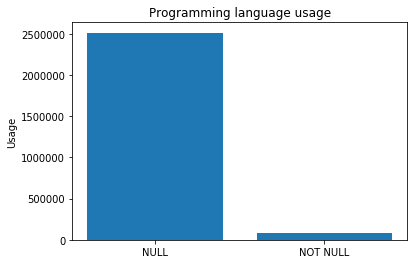

In [216]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

null_propertyname_count = len(lv_data_201907["PROPERTY NAME"][lv_data_201907["PROPERTY NAME"].isnull()].index)
notnull_propertyname_count = len(lv_data_201907["PROPERTY NAME"][~lv_data_201907["PROPERTY NAME"].isnull()].index)

objects = ("NULL", "NOT NULL")
y_pos = np.arange(len(objects))
frequency = [null_propertyname_count, notnull_propertyname_count]

null_notnull_column_graph = plt.bar(y_pos, frequency, align='center')
plt.title('Programming language usage')
plt.xticks(y_pos, objects)
plt.ylabel('Usage')
null_notnull_column_graph.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()

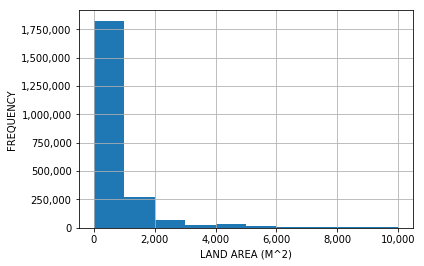

In [184]:
# ================================
# DETERMINING CRITERIA FOR A HOUSE
# ================================


lv_data_201907_area_hist = lv_data_201907["AREA"][lv_data_201907["AREA TYPE"] == "M"].hist(range=(0,10000))
plt.xlabel("LAND AREA (M^2)")
plt.ylabel("FREQUENCY")

# format axes
lv_data_201907_area_hist.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
lv_data_201907_area_hist.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))


- ## PROPERTY NAME
- ## AREA
- ## LAND VALUE

# DISSECTING THE QUESTION

# THE RESULTS

# FUNNY THINGS
## DEFQON
## UNSW